In [ ]:
#split 75 25

root
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)

+--------------------+------+--------+---------+----+------+------+--------+------------+------+-------+--

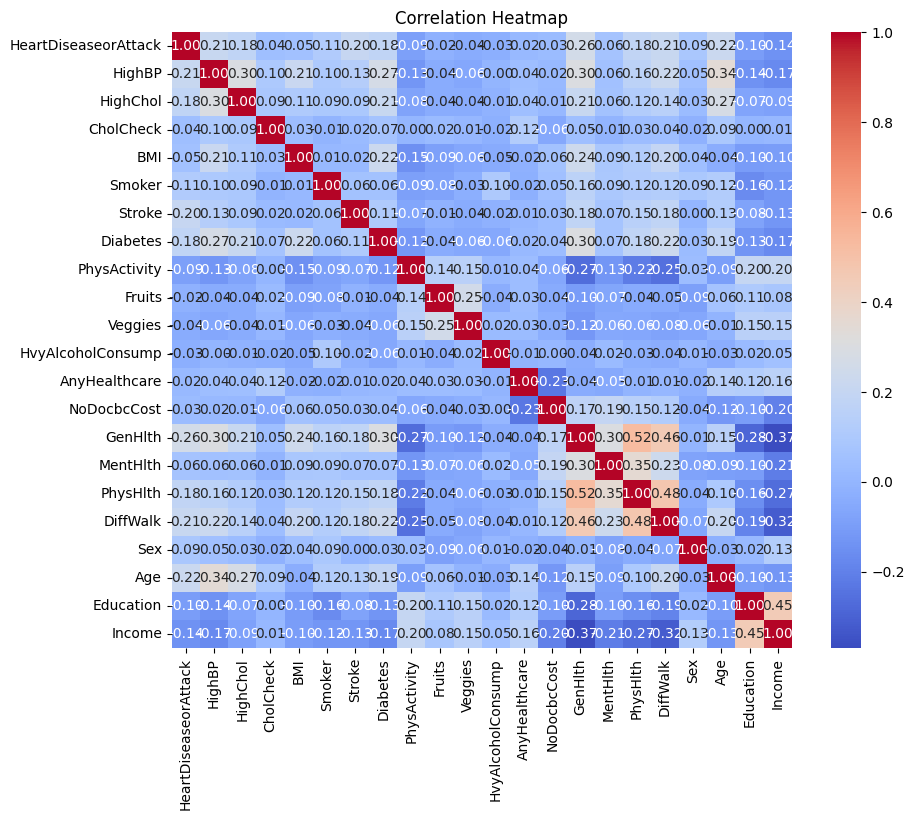

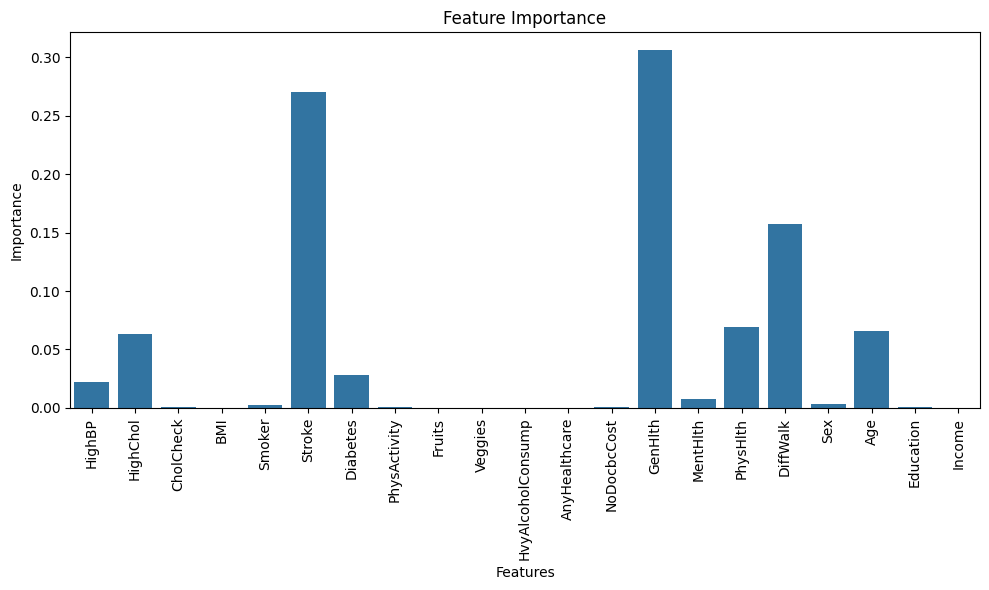

+--------------------+----------+-----+
|HeartDiseaseorAttack|prediction|count|
+--------------------+----------+-----+
|                 1.0|       1.0|   66|
|                 0.0|       1.0|   28|
|                 1.0|       0.0| 5967|
|                 0.0|       0.0|57633|
+--------------------+----------+-----+

Confusion Matrix:
[[57633    28]
 [ 5967    66]]


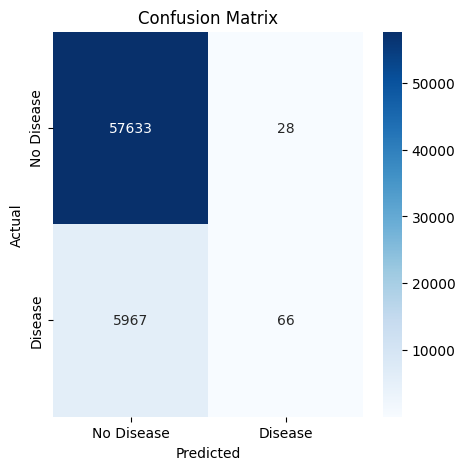

Metrics computed from confusion matrix:
Accuracy:  0.9058781046880396
Classification Error: 0.09412189531196036
Sensitivity/Recall:  0.01093983092988563
Specificity:  0.9995144031494424
Precision:  0.7021276595744681
False Positive Rate: 0.0004855968505576014


In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnull, when, count, col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.types import IntegerType, DoubleType
from sklearn import metrics

# Create a Spark session
spark = SparkSession.builder.appName('ml-cls').getOrCreate()

# Load the dataset
df = spark.read.csv('/content/drive/MyDrive/heart_disease_health_indicators.csv', header=True, inferSchema=True)

# Show the schema and first few rows to check column names
df.printSchema()
df.show(5)

# Check for missing values
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

# Drop unnecessary columns
df = df.drop('skin_triceps', 'bp_diastolic')  # Replace these with column names that are unnecessary in your dataset

# Select only numerical columns for heatmap
numerical_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, (IntegerType, DoubleType))]

# Create a Pandas DataFrame for numerical columns
df_pandas = df.select(numerical_cols).toPandas()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_pandas.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Define label column
label_column = 'HeartDiseaseorAttack'  # Replace with the correct label column name
X = df.drop(label_column)  # Drop the label column

# Assemble features
assembler = VectorAssembler(inputCols=X.columns, outputCol='features')
transformed_data = assembler.transform(df)

# Split data into training and testing sets
(X_train, X_test) = transformed_data.randomSplit([0.75, 0.25])

# Build and train Random Forest Classifier
rf_clf = RandomForestClassifier(featuresCol='features', labelCol=label_column, numTrees=10, maxDepth=5)
rf_model = rf_clf.fit(X_train)

# Make predictions
predictions = rf_model.transform(X_test)

# Feature importance
feature_importances = rf_model.featureImportances.toArray()
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=feature_importances)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Evaluate model
predictions.groupBy(label_column, 'prediction').count().show()

# Calculate evaluation metrics
y_true = predictions.select(label_column).rdd.flatMap(list).collect()
y_pred = predictions.select('prediction').rdd.flatMap(list).collect()
cm = metrics.confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate evaluation metrics
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TN + TP) / (TN + TP + FN + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

# Print metrics
print('Metrics computed from confusion matrix:')
print("Accuracy: ", accuracy)
print("Classification Error:", 1 - accuracy)
print("Sensitivity/Recall: ", recall)
print("Specificity: ", specificity)
print("Precision: ", precision)
print("False Positive Rate:", 1 - specificity)


In [ ]:
# split 80 20

root
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)

+--------------------+------+--------+---------+----+------+------+--------+------------+------+-------+--

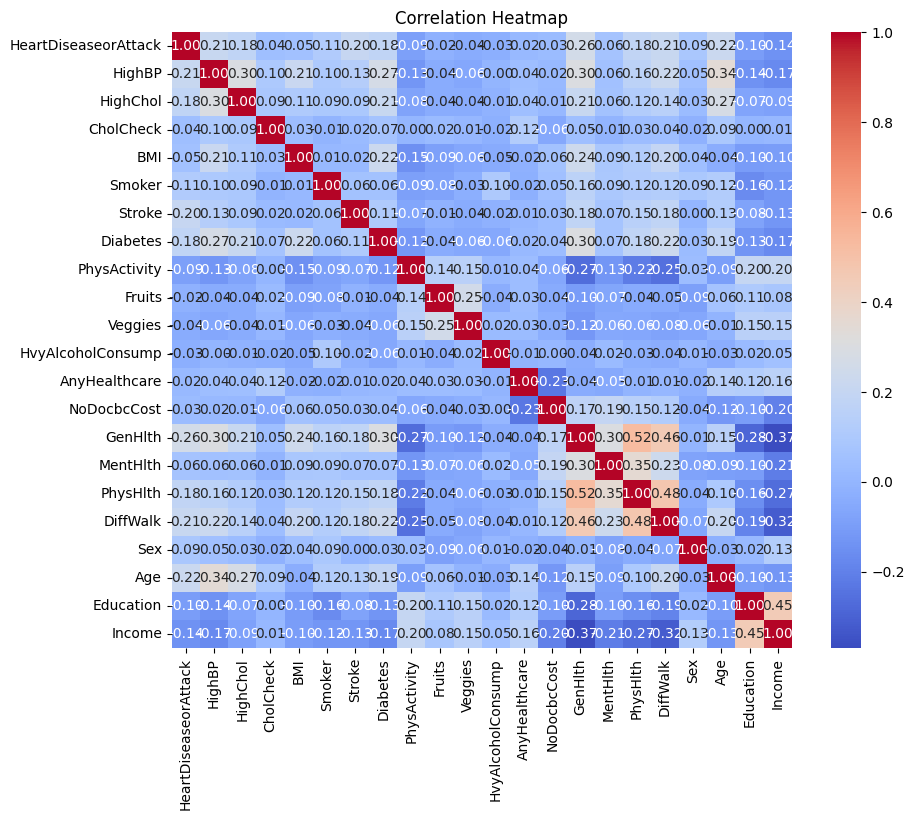

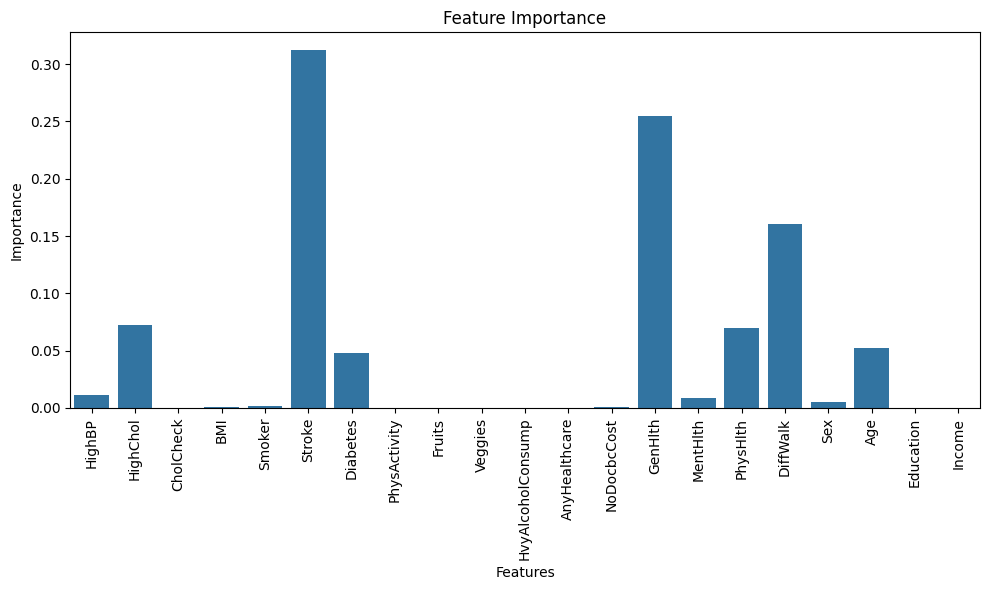

+--------------------+----------+-----+
|HeartDiseaseorAttack|prediction|count|
+--------------------+----------+-----+
|                 1.0|       1.0|   42|
|                 0.0|       1.0|   15|
|                 1.0|       0.0| 4695|
|                 0.0|       0.0|45600|
+--------------------+----------+-----+

Confusion Matrix:
[[45600    15]
 [ 4695    42]]


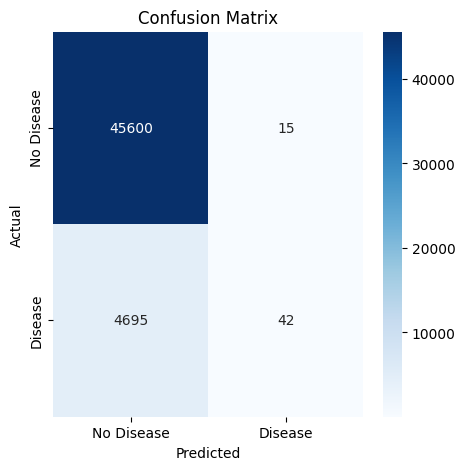

Metrics computed from confusion matrix:
Accuracy:  0.9064585319351763
Classification Error: 0.09354146806482366
Sensitivity/Recall:  0.008866371120962635
Specificity:  0.9996711608023676
Precision:  0.7368421052631579
False Positive Rate: 0.0003288391976323801


In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnull, when, count, col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.types import IntegerType, DoubleType
from sklearn import metrics

# Create a Spark session
spark = SparkSession.builder.appName('ml-cls').getOrCreate()

# Load the dataset
df = spark.read.csv('/content/drive/MyDrive/heart_disease_health_indicators.csv', header=True, inferSchema=True)

# Show the schema and first few rows to check column names
df.printSchema()
df.show(5)

# Check for missing values
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

# Drop unnecessary columns
df = df.drop('skin_triceps', 'bp_diastolic')  # Replace these with column names that are unnecessary in your dataset

# Select only numerical columns for heatmap
numerical_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, (IntegerType, DoubleType))]

# Create a Pandas DataFrame for numerical columns
df_pandas = df.select(numerical_cols).toPandas()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_pandas.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Define label column
label_column = 'HeartDiseaseorAttack'  # Replace with the correct label column name
X = df.drop(label_column)  # Drop the label column

# Assemble features
assembler = VectorAssembler(inputCols=X.columns, outputCol='features')
transformed_data = assembler.transform(df)

# Split data into training and testing sets
(X_train, X_test) = transformed_data.randomSplit([0.8, 0.2])

# Build and train Random Forest Classifier
rf_clf = RandomForestClassifier(featuresCol='features', labelCol=label_column, numTrees=10, maxDepth=5)
rf_model = rf_clf.fit(X_train)

# Make predictions
predictions = rf_model.transform(X_test)

# Feature importance
feature_importances = rf_model.featureImportances.toArray()
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=feature_importances)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Evaluate model
predictions.groupBy(label_column, 'prediction').count().show()

# Calculate evaluation metrics
y_true = predictions.select(label_column).rdd.flatMap(list).collect()
y_pred = predictions.select('prediction').rdd.flatMap(list).collect()
cm = metrics.confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate evaluation metrics
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TN + TP) / (TN + TP + FN + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

# Print metrics
print('Metrics computed from confusion matrix:')
print("Accuracy: ", accuracy)
print("Classification Error:", 1 - accuracy)
print("Sensitivity/Recall: ", recall)
print("Specificity: ", specificity)
print("Precision: ", precision)
print("False Positive Rate:", 1 - specificity)


In [ ]:
#split 70 30

root
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)

+--------------------+------+--------+---------+----+------+------+--------+------------+------+-------+--

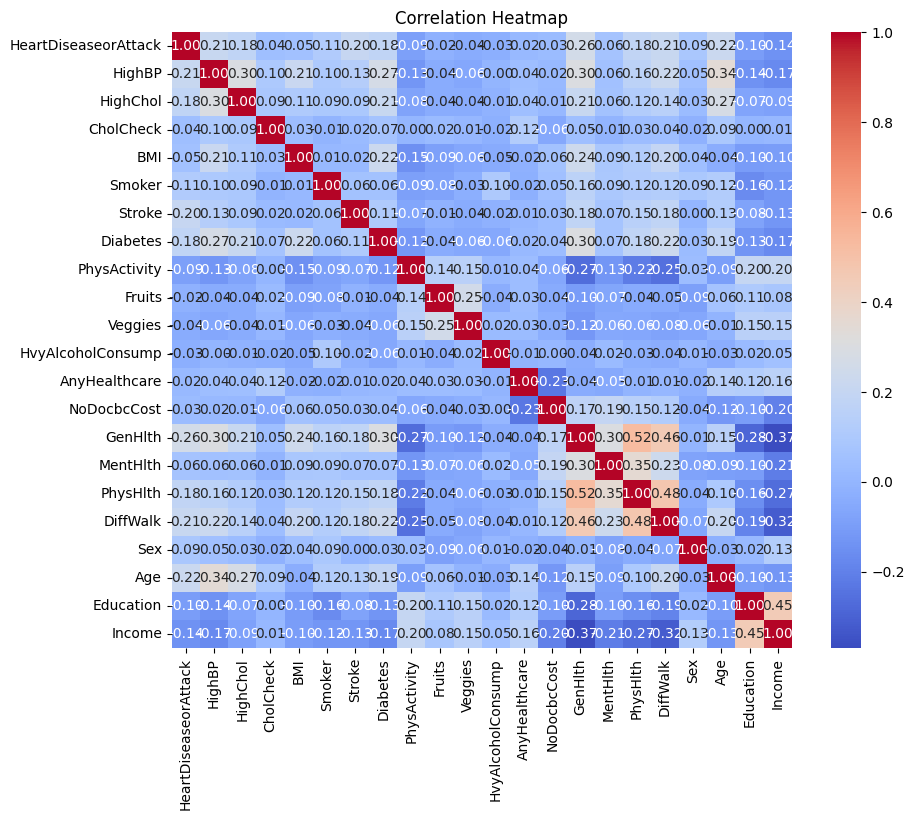

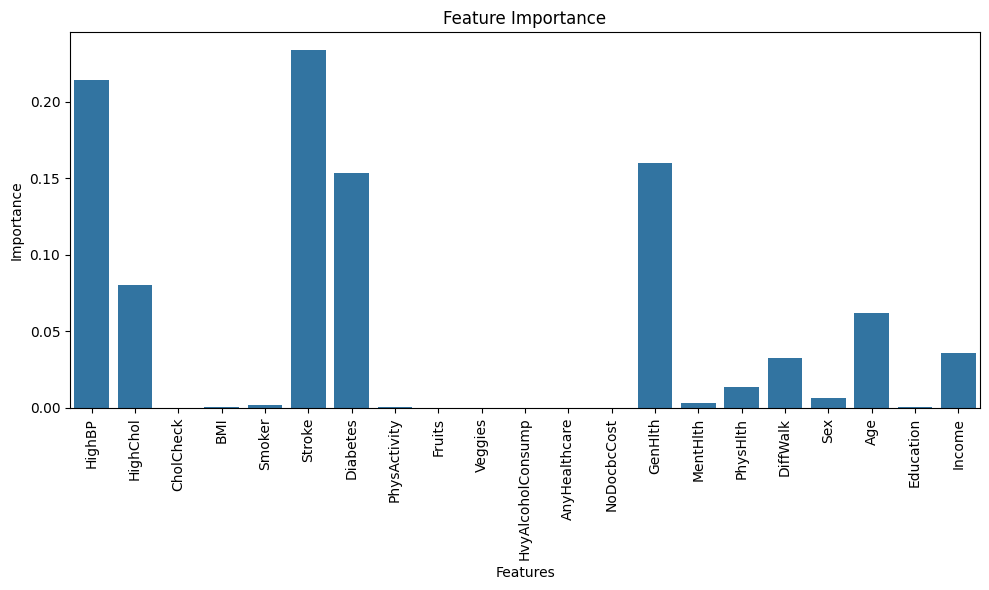

+--------------------+----------+-----+
|HeartDiseaseorAttack|prediction|count|
+--------------------+----------+-----+
|                 1.0|       1.0|   13|
|                 0.0|       1.0|    3|
|                 1.0|       0.0| 7248|
|                 0.0|       0.0|68963|
+--------------------+----------+-----+

Confusion Matrix:
[[68963     3]
 [ 7248    13]]


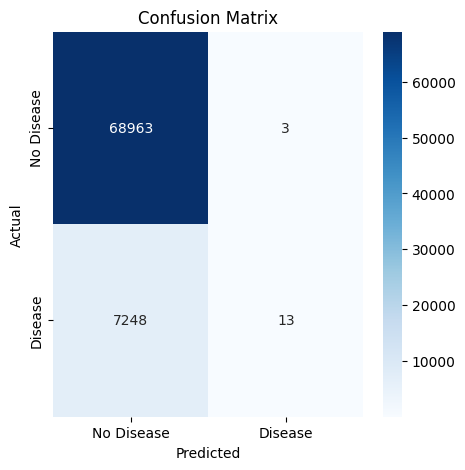

Metrics computed from confusion matrix:
Accuracy:  0.9048762249596599
Classification Error: 0.09512377504034009
Sensitivity/Recall:  0.0017903869990359455
Specificity:  0.9999565003044979
Precision:  0.8125
False Positive Rate: 4.349969550210275e-05


In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnull, when, count, col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.types import IntegerType, DoubleType
from sklearn import metrics

# Create a Spark session
spark = SparkSession.builder.appName('ml-cls').getOrCreate()

# Load the dataset
df = spark.read.csv('/content/drive/MyDrive/heart_disease_health_indicators.csv', header=True, inferSchema=True)

# Show the schema and first few rows to check column names
df.printSchema()
df.show(5)

# Check for missing values
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

# Drop unnecessary columns
df = df.drop('skin_triceps', 'bp_diastolic')  # Replace these with column names that are unnecessary in your dataset

# Select only numerical columns for heatmap
numerical_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, (IntegerType, DoubleType))]

# Create a Pandas DataFrame for numerical columns
df_pandas = df.select(numerical_cols).toPandas()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_pandas.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Define label column
label_column = 'HeartDiseaseorAttack'  # Replace with the correct label column name
X = df.drop(label_column)  # Drop the label column

# Assemble features
assembler = VectorAssembler(inputCols=X.columns, outputCol='features')
transformed_data = assembler.transform(df)

# Split data into training and testing sets
(X_train, X_test) = transformed_data.randomSplit([0.7, 0.3])

# Build and train Random Forest Classifier
rf_clf = RandomForestClassifier(featuresCol='features', labelCol=label_column, numTrees=10, maxDepth=5)
rf_model = rf_clf.fit(X_train)

# Make predictions
predictions = rf_model.transform(X_test)

# Feature importance
feature_importances = rf_model.featureImportances.toArray()
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=feature_importances)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Evaluate model
predictions.groupBy(label_column, 'prediction').count().show()

# Calculate evaluation metrics
y_true = predictions.select(label_column).rdd.flatMap(list).collect()
y_pred = predictions.select('prediction').rdd.flatMap(list).collect()
cm = metrics.confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate evaluation metrics
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TN + TP) / (TN + TP + FN + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

# Print metrics
print('Metrics computed from confusion matrix:')
print("Accuracy: ", accuracy)
print("Classification Error:", 1 - accuracy)
print("Sensitivity/Recall: ", recall)
print("Specificity: ", specificity)
print("Precision: ", precision)
print("False Positive Rate:", 1 - specificity)


root
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)

+--------------------+------+--------+---------+----+------+------+--------+------------+------+-------+--

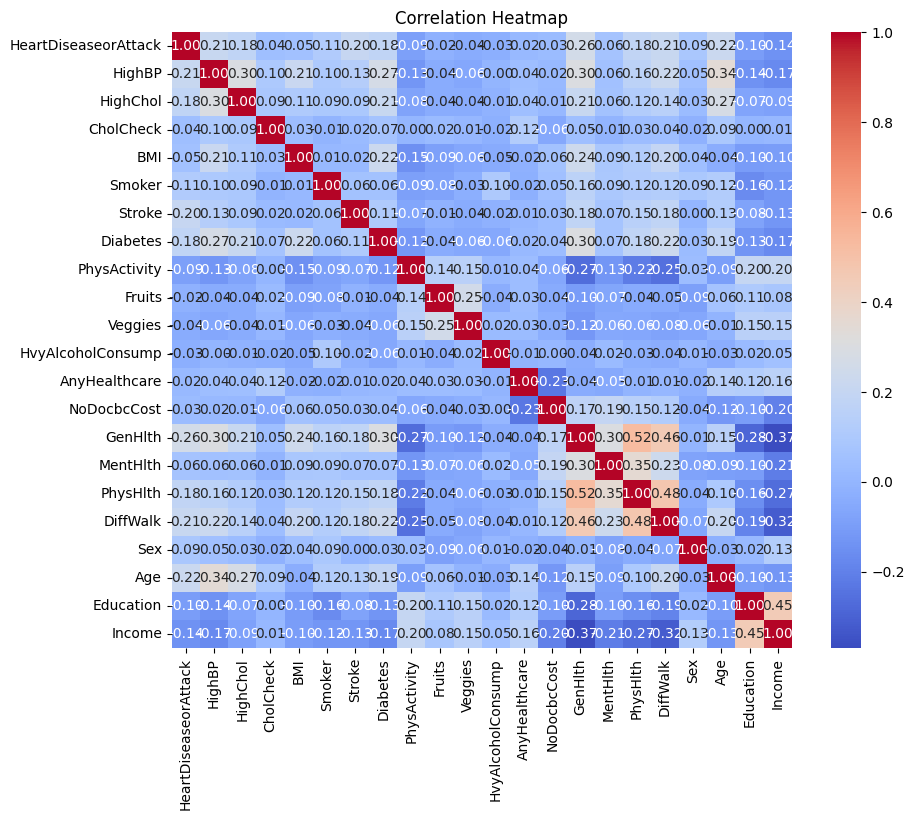

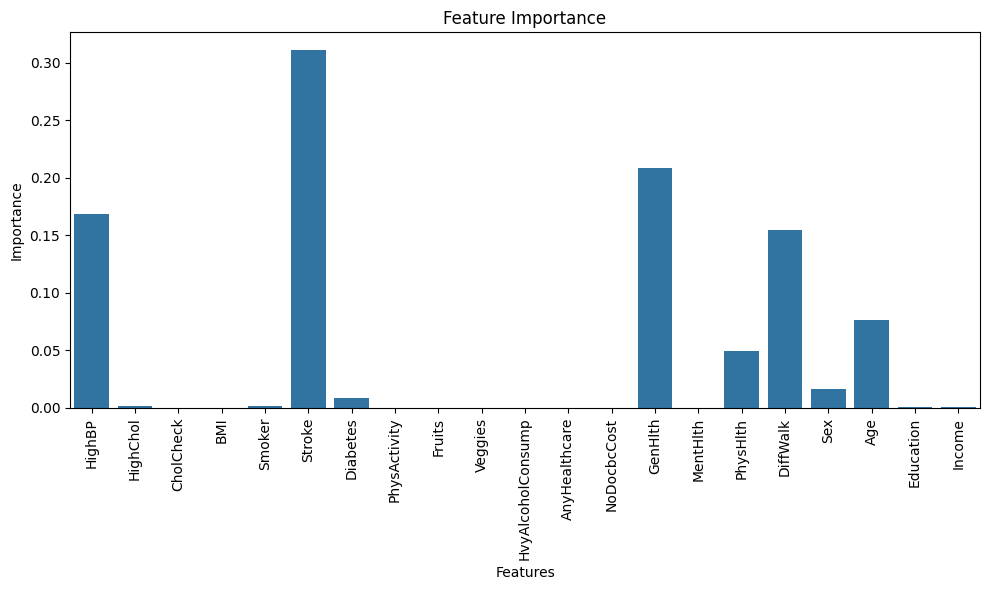

+--------------------+----------+-----+
|HeartDiseaseorAttack|prediction|count|
+--------------------+----------+-----+
|                 1.0|       1.0|    5|
|                 1.0|       0.0| 6065|
|                 0.0|       0.0|57353|
+--------------------+----------+-----+

Confusion Matrix:
[[57353     0]
 [ 6065     5]]


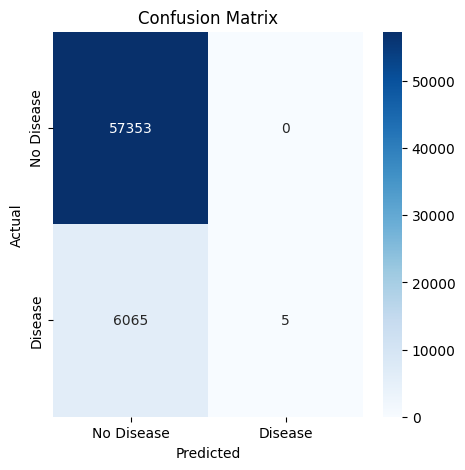

Metrics computed from confusion matrix:
Accuracy:  0.9043722308941551
Classification Error: 0.09562776910584492
Sensitivity/Recall:  0.0008237232289950577
Specificity:  1.0
Precision:  1.0
False Positive Rate: 0.0


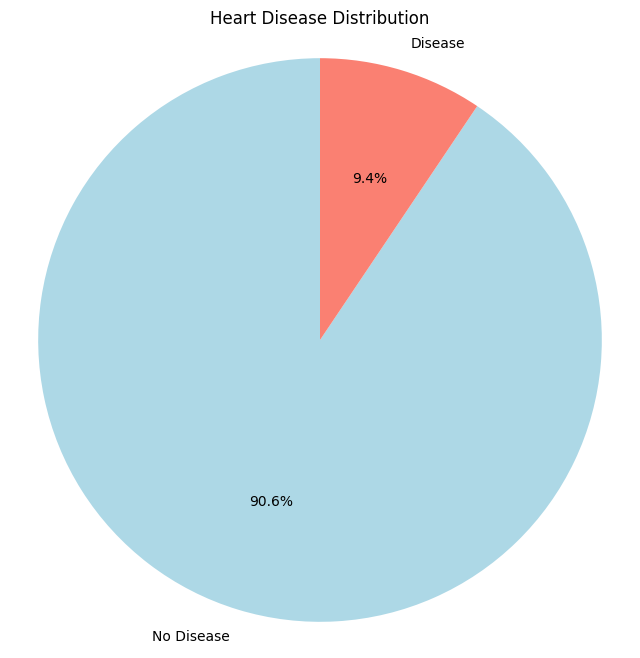

In [2]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnull, when, count, col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.types import IntegerType, DoubleType
from sklearn import metrics

# Create a Spark session
spark = SparkSession.builder.appName('ml-cls').getOrCreate()

# Load the dataset
df = spark.read.csv('/content/drive/MyDrive/heart_disease_health_indicators.csv', header=True, inferSchema=True)

# Show the schema and first few rows to check column names
df.printSchema()
df.show(5)

# Check for missing values
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

# Drop unnecessary columns
df = df.drop('skin_triceps', 'bp_diastolic')  # Replace these with column names that are unnecessary in your dataset

# Select only numerical columns for heatmap
numerical_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, (IntegerType, DoubleType))]

# Create a Pandas DataFrame for numerical columns
df_pandas = df.select(numerical_cols).toPandas()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_pandas.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Define label column
label_column = 'HeartDiseaseorAttack'  # Replace with the correct label column name
X = df.drop(label_column)  # Drop the label column

# Assemble features
assembler = VectorAssembler(inputCols=X.columns, outputCol='features')
transformed_data = assembler.transform(df)

# Split data into training and testing sets
(X_train, X_test) = transformed_data.randomSplit([0.75, 0.25])

# Build and train Random Forest Classifier
rf_clf = RandomForestClassifier(featuresCol='features', labelCol=label_column, numTrees=10, maxDepth=5)
rf_model = rf_clf.fit(X_train)

# Make predictions
predictions = rf_model.transform(X_test)

# Feature importance
feature_importances = rf_model.featureImportances.toArray()
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=feature_importances)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Evaluate model
predictions.groupBy(label_column, 'prediction').count().show()

# Calculate evaluation metrics
y_true = predictions.select(label_column).rdd.flatMap(list).collect()
y_pred = predictions.select('prediction').rdd.flatMap(list).collect()
cm = metrics.confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate evaluation metrics
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TN + TP) / (TN + TP + FN + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

# Print metrics
print('Metrics computed from confusion matrix:')
print("Accuracy: ", accuracy)
print("Classification Error:", 1 - accuracy)
print("Sensitivity/Recall: ", recall)
print("Specificity: ", specificity)
print("Precision: ", precision)
print("False Positive Rate:", 1 - specificity)

# Plot pie chart for heart disease distribution
heart_disease_counts = df.groupBy(label_column).count().toPandas()
labels = ['No Disease', 'Disease']
sizes = heart_disease_counts['count']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Heart Disease Distribution')
plt.axis('equal')
plt.show()


In [ ]:
A